# Stock Price Prediction Using LSTM 

In [ ]:
# pip install yfinance pandas numpy matplotlib scikit-learn tensorflow

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [4]:
# Download historical data for PayPal (you can replace with your chosen fintech company)
stock_data = yf.download('PYPL', start='2015-01-01', end='2023-01-01')
print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2015-07-06  38.000000  39.750000  36.000000  36.709999  36.709999  5866600
2015-07-07  37.720001  37.810001  36.000000  36.619999  36.619999  7359000
2015-07-08  36.340000  36.360001  34.529999  34.700001  34.700001  5387700
2015-07-09  35.099998  35.520000  33.990002  34.500000  34.500000  3760100
2015-07-10  34.660000  35.189999  33.980000  34.689999  34.689999  4472800


In [ ]:
# Data Preprocessing

In [6]:
# Scaling the Data
# Use only the 'Close' prices for prediction
data = stock_data['Close'].values
data = data.reshape(-1, 1)

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [8]:
# Create Sequences for LSTM Input
# Function to create sequences for LSTM
def create_sequences(data, time_step=60):
    X = []
    y = []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create sequences for training data
time_step = 60
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape the data to be [samples, time steps, features] as expected by LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#  Building the LSTM Model

In [10]:
# Build the LSTM model
model = Sequential()

# First LSTM layer with Dropout to prevent overfitting
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

C:\Users\milto\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0374
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0023
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0024
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0017
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0015
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0017
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0014
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0015
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0016
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0014
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0012
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0015
Epoch 13/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0013
Epoch 14/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0014
Epoch 15/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0011
Epoc

In [ ]:
# Evaluate the Model

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


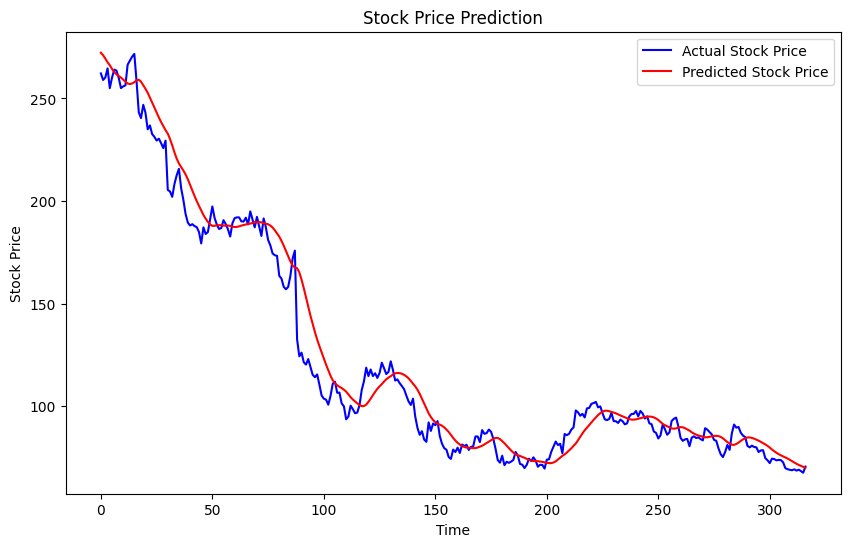

In [12]:
# Make predictions on test data
predicted_stock_price = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_actual = scaler.inverse_transform([y_test])

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual[0], color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Model Evaluation

In [14]:
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean(np.power((predicted_stock_price - y_test_actual), 2)))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 82.47186554372728


In [ ]:
# Step 8: Hyperparameter Tuning

You can improve the model by tuning the hyperparameters:

    Change the number of LSTM units (neurons).
    Adjust the time-step window.
    Experiment with the number of epochs and batch sizes.
    Add more layers or change the dropout rate to avoid overfitting.Model Evaluation on Test Set